<a href="https://colab.research.google.com/github/LucasBezerraSantos/Projetos_BlueEdtech/blob/BlueEdtech/An%C3%A1lise_Explorat%C3%B3ria_%7C_Mercari_Marketplace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória | Mercari Marketplace
---
Lucas Bezerra Santos

### Leitura dos Dados

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd 
import numpy as np

In [4]:
train = pd.read_csv('/content/drive/MyDrive/BTC/BTC-Dados-G4/train_clean_rev2.csv')

## Visualização

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

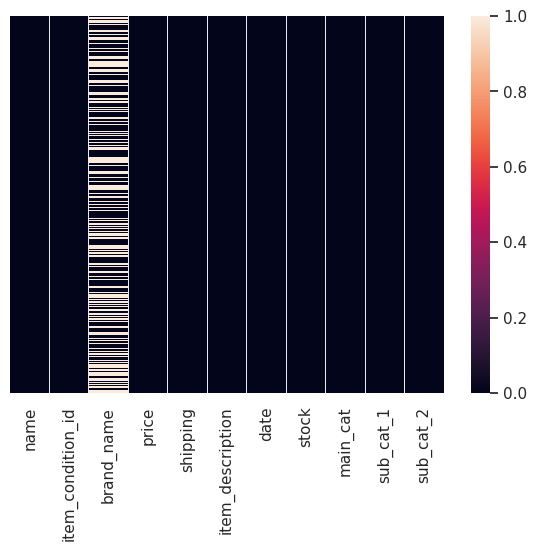

In [6]:
plt.figure(figsize=(7, 5), dpi=100)
sns.heatmap(train.isnull(), yticklabels=False)
plt.show()

Avaliação de dados nulos

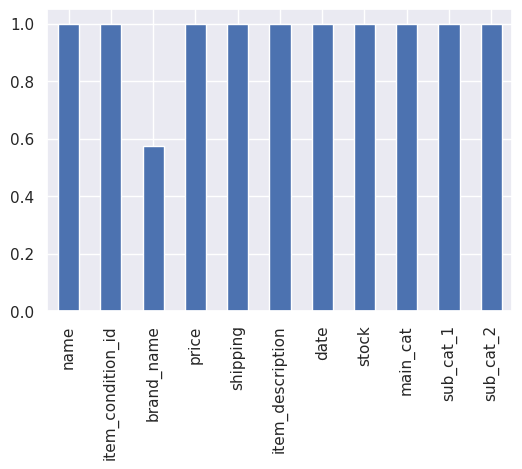

In [7]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=100)
(1 - train.isnull().mean()).abs().plot.bar(ax=ax)
plt.show()

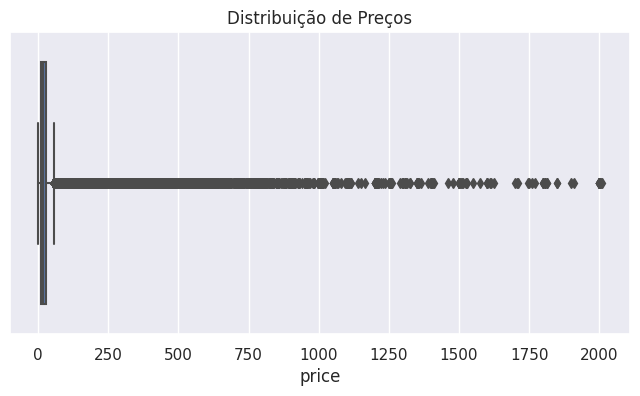

In [8]:
plt.figure(figsize=(8, 4), dpi=100)
sns.boxplot(x='price', data=train)
plt.title('Distribuição de Preços')
plt.show()

O conjunto de dados possui diferentes categorias, marcas e produtos. Abaixo pode-se visualizar a distribuição de preços em cada uma delas.

<ipython-input-9-b3312de23800>:3: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


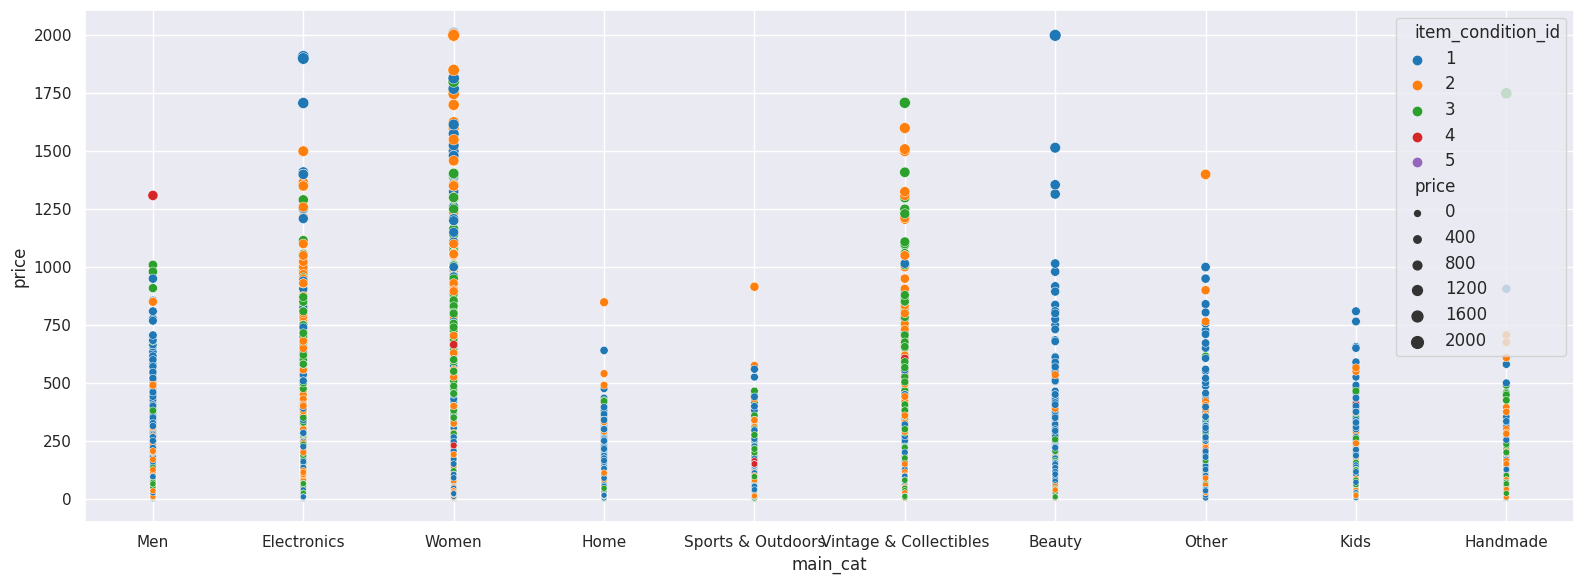

In [9]:
plt.figure(figsize=(16,6), dpi=100)
sns.scatterplot(x='main_cat', y='price', hue='item_condition_id', size='price', palette='tab10' , data= train)
plt.tight_layout()
plt.show()

In [10]:
train.columns

Index(['name', 'item_condition_id', 'brand_name', 'price', 'shipping',
       'item_description', 'date', 'stock', 'main_cat', 'sub_cat_1',
       'sub_cat_2'],
      dtype='object')

Avaliação de preços de calçados de acordo com a Marca

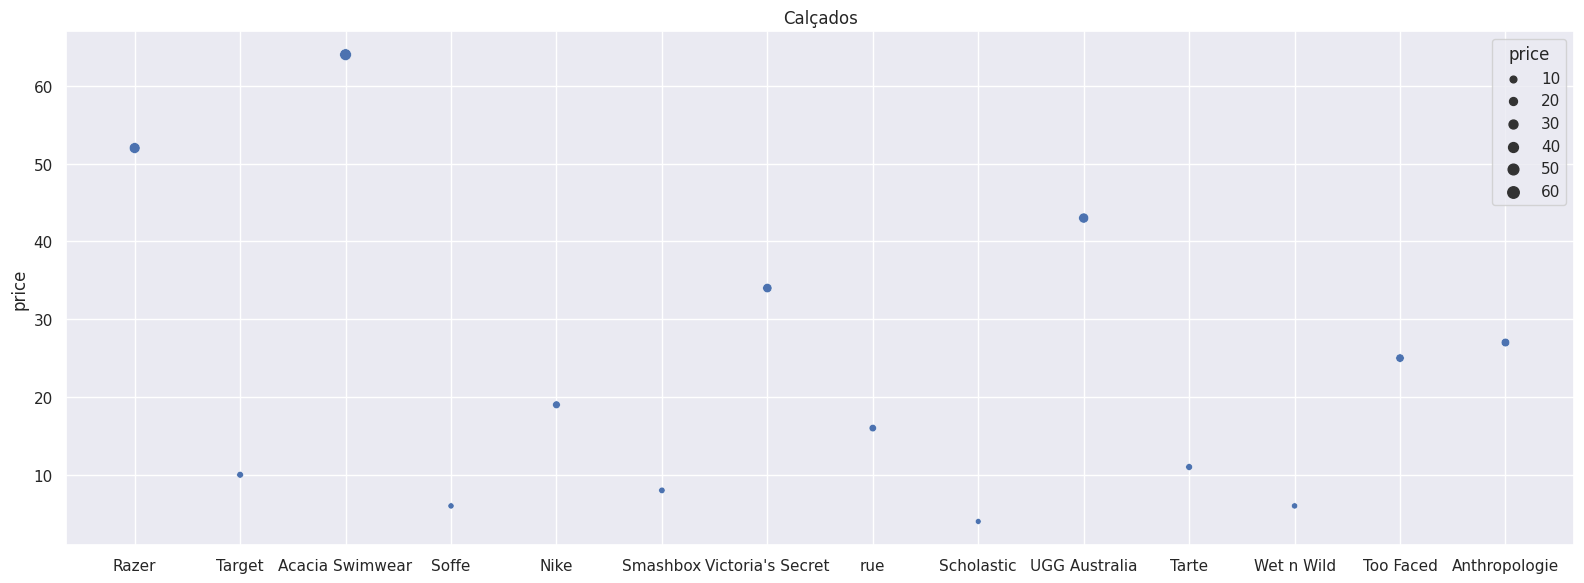

In [11]:
plt.figure(figsize=(16,6), dpi=100)
sns.scatterplot(x='brand_name', y='price', size='price', palette='tab10' , data= train.head(20))
plt.title('Calçados')
plt.xlabel('')
plt.tight_layout()
plt.show()

## Transformação de Dados

A categoria feminina possui maior quantidade de produtos anunciados e desbalanceia o dataset, por esse motivo vamos reduzir ela retirando dados duplicados para que o aprendizado de maquina possa ser mais generalista.

In [12]:
train.columns

Index(['name', 'item_condition_id', 'brand_name', 'price', 'shipping',
       'item_description', 'date', 'stock', 'main_cat', 'sub_cat_1',
       'sub_cat_2'],
      dtype='object')

In [13]:
maior_categoria = train[train['main_cat'] == 'Women']

In [14]:
maior_categoria_new = maior_categoria.drop_duplicates(subset =['brand_name', 'name'],
                     keep= 'first', inplace = False)

In [15]:
index_maior_categoria = maior_categoria_new.index 
index_maior_categoria = np.array(index_maior_categoria)

index_dados_unicos = train[train['main_cat'] == 'Women'].index
index_dados_unicos = np.array(index_dados_unicos)

drop_index = np.setdiff1d(index_dados_unicos, index_maior_categoria)
dados_unicos = train.drop(drop_index, axis=0) 

## Outliers

Remoção de outliers que possuem preço acima de 98% do dataset em suas respectivas categorias. Recomenda-se futuramente avaliar se eles diminuem a eficácia do modelo ou não. 

In [16]:
percentil = dados_unicos['price'].quantile(.98)
outliers = dados_unicos[dados_unicos['price'] > percentil]

In [17]:
index_outliers = outliers.index 
dados_unicos = dados_unicos.drop(index_outliers, axis=0) 

<ipython-input-18-207336df554a>:3: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


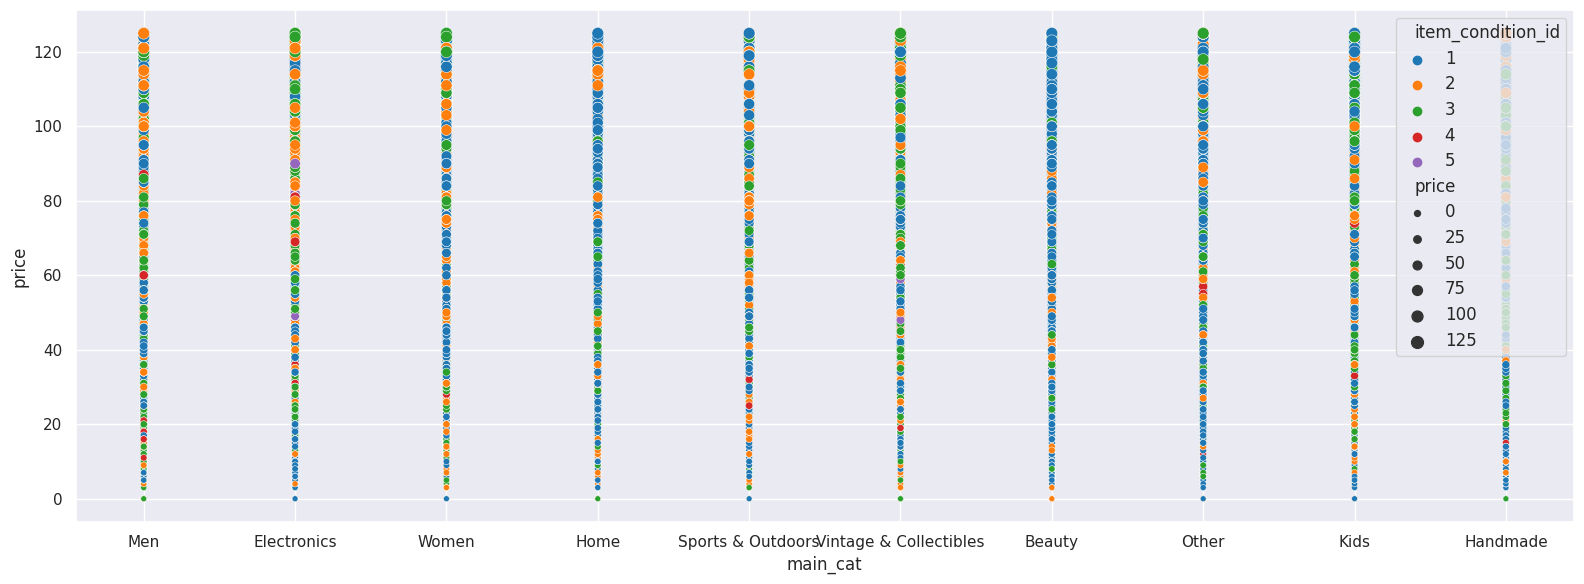

In [18]:
plt.figure(figsize=(16,6), dpi=100)
sns.scatterplot(x='main_cat', y='price', hue='item_condition_id', size='price', palette='tab10' , data= dados_unicos)
plt.tight_layout()
plt.show()

## Drop Linhas Dúplicadas

In [19]:
dados_unicos.shape

(1341267, 11)

In [20]:
def Apaga_Duplicado(data='x', colunas=['y']):
  data = data.drop_duplicates(subset = colunas, keep= 'first', inplace = False)
  return data

In [21]:
dados_unicos = Apaga_Duplicado(dados_unicos, ['name','brand_name','price'])

In [22]:
dados_unicos.shape

(1308675, 11)

## Tratamento NLP

### Import Bibliotecas

In [ ]:
import nltk

nltk.download('all')

In [24]:
from nltk.corpus import stopwords
import re
import collections

In [25]:
from spacy.tokens import Span

In [26]:
import spacy
import spacy.cli
spacy.cli.download('en')

nlp = spacy.load('en_core_web_sm')

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


### Criando Funções

In [27]:
amostra = dados_unicos.head(7000)

In [28]:
def limpa_texto(data, col): 
  """
  retira pontuações e caracteres especiais, incluindo no df o resultado
  """
  data[col] = data[col].str.lower()
  data[col] = data[col].apply(lambda x: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", '', x))

In [29]:
limpa_texto(amostra, 'item_description')

<ipython-input-28-241e65b439b0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].str.lower()
<ipython-input-28-241e65b439b0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].apply(lambda x: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", '', x))


In [30]:
amostra['item_description']

0                                      no description yet
1       this keyboard is in great condition and works ...
2       adorable top with a hint of lace and a key hol...
3       new with tags leather horses retail for rm eac...
4               complete with certificate of authenticity
                              ...                        
7167    brand new with tags extra large bright redoran...
7168                   2 cc cream medium to deep exp 0419
7169    lemon yellow color full coverage seamless with...
7171    baby skin care products 1 yardley baby gentle ...
7172      gently used small black and white koi scrub top
Name: item_description, Length: 7000, dtype: object

In [31]:
def remove_numeros(dados='x', coluna='y'):
  identifica_numero = dados[coluna].str.split().dropna()
  lista_sem_numeros = []

  for palavra in identifica_numero:
    for elemento in palavra:
      if type(elemento) is float or type(elemento) is int:
        ''
      else:
        lista_sem_numeros.append(elemento)

  return lista_sem_numeros

In [32]:
lista_sem_numeros = remove_numeros(amostra, 'item_description')

In [33]:
def frequencia_de_palavras(lista):

  ''' Identifica o numero de repetições de cada palavra no texto '''
  
  palavras_comuns = stopwords.words('english')
  lista = [palavra for palavra in lista if palavra not in palavras_comuns]

  return collections.Counter(lista)

In [34]:
freq_palavras = frequencia_de_palavras(lista_sem_numeros)

In [35]:
def data_frame_de_frequencia(x):  
  
  ''' Cria um DataFrame com a Frequencia das Palavras '''

  lista_de_palavras = []
  lista_frequencia = []
  for palavra, frequencia in x.items():
    lista_de_palavras.append(palavra)
    lista_frequencia.append(frequencia)
  return pd.DataFrame(
    {'lista_de_palavras': lista_de_palavras,
     'lista_frequencia': lista_frequencia}
      )

In [36]:
dados_de_frequência = data_frame_de_frequencia(freq_palavras)

In [37]:
dados_de_frequência.sort_values('lista_frequencia', ascending=False)

,lista_de_palavras,lista_frequencia
34,new,2336
66,size,2004
161,brand,1301
48,free,1177
4,condition,1122
...,...,...
8026,software,1
8025,dvdrom,1
8023,notrades,1
8021,ctw,1


In [38]:
def entidades_do_texto(lista_palavras):

  ''' Revela quais entidades temos nos textos '''

  entidades = []
  for ent in lista_palavras.ents:
    entidades.append(ent.label_)

  entidades = sorted(set(entidades))
  return entidades

### Analisando entidades

In [39]:
unir_palavras = " ".join(lista_sem_numeros)
unir_palavras = nlp(unir_palavras)

In [40]:
nome_de_empresas = []
for ent in unir_palavras.ents:
  if ent.label_ == 'ORG':
    nome_de_empresas.append(ent.text)

In [41]:
#Aplicação de funções 

mais_comentadas = frequencia_de_palavras(nome_de_empresas)
mais_comentadas = data_frame_de_frequencia(mais_comentadas)

In [42]:
mais_comentadas.sort_values('lista_frequencia', ascending=False, inplace=True)
mais_comentadas.head(5)

,lista_de_palavras,lista_frequencia
8,navy,45
21,xl,37
10,samsung,29
33,nwt,15
66,charlotte russe,13


In [43]:
entidades_do_texto(unir_palavras)

['CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART']

In [44]:
empresas = mais_comentadas['lista_de_palavras'].values
print('Existem', len(empresas), 'Empresas registradas na coluna Descrição nesta amostra de:', len(amostra))

Existem 358 Empresas registradas na coluna Descrição nesta amostra de: 7000


### Visualização

In [45]:
from matplotlib.colors import ListedColormap
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [46]:
grafico_nuvem = str(unir_palavras)

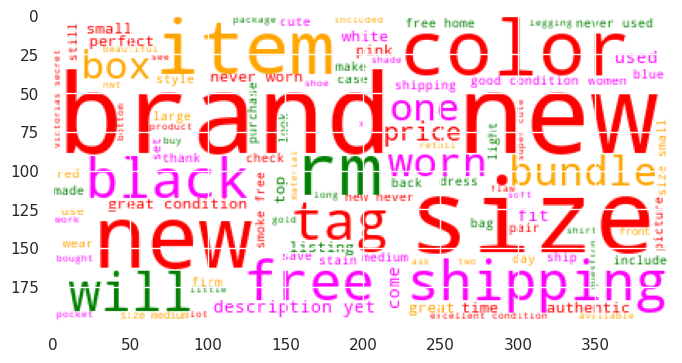

In [47]:
mapa_cores = ListedColormap(['orange','green','red','magenta'])
nuvem = WordCloud(background_color= 'white', 
                  colormap = mapa_cores,
                  max_words = 100)
nuvem.generate(grafico_nuvem)
plt.figure(figsize=(8,6), dpi=100)
plt.imshow(nuvem)

## Comentários

Esse dataset tem muitos dados nulos na coluna que contém o nome das empresas. Identificou-se que a Marca é um atributo relevante e que influência no preço do produto. Por esse motivo, a continuação desse trabalho deverá identificar os nomes das empresas na descrição do produto e preencher onde a marca estiver vazia. Após essa rotulação, se iniciará a análise de qual modelo de ML será aplicado.